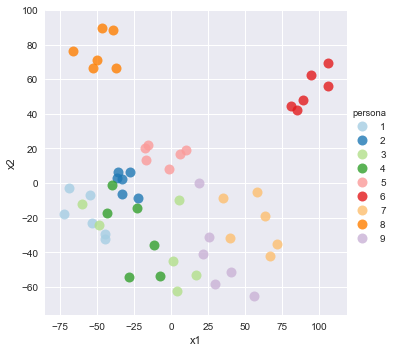

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import neighbors
import knn

df = pd.read_csv('csv/X2.csv')

sns.lmplot('x1', 'x2', data=df, fit_reg=False, hue="persona", palette="Paired", scatter_kws={"marker": "D","s": 100})

#plt.figure(figsize=(8,6))
#knn.plot(df, 3, 0.5)

## N-Fold Cross Validation

Empezamos con las 41 personas con 10 imagenes cada una. Guardamos la imagen 10 para usar ams tarde, y mezclamos las restantes 9 imagenes y hacemos n folds.

Generamos nueve archivos `tests/fold{0..8}.in` que son la entrada de `tp2` y contamos la cantidad de éxitos.

In [5]:
from random import shuffle
from collections import defaultdict

def group(l):
    d = defaultdict(list)
    for p, i in l:
        d[p].append(i)
    return d

def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

pca_n = 4
personas = 41
imagenes = 9
size = 1 # <-- n

imgs = [str(i + 1) for i in range(imagenes)]
shuffle(imgs)
folds = list(chunks(imgs, size))

for i, fold in enumerate(folds):
    with open('tests/fold{}.in'.format(i), 'w') as f:
        f.write('../data/ImagenesCarasRed/ 28 23 41 {} {}\n'.format(9 - size, pca_n))
        f.write('\n')
        
        others = folds[0 : i] + folds[i+1 : int(imagenes/size)]
        others_flat = [x for y in others for x in y]
                
        for p in range(personas):
            f.write('s{}/ '.format(p+1) + ' '.join(others_flat))
            f.write('\n')
            
        f.write(str(personas))
        f.write('\n')
        for p in range(personas):
            for img in fold:
                f.write('../data/ImagenesCarasRed/s{}/{}.pgm {}'.format(p+1, img, p+1))
                f.write('\n')
        print(f.name, '✔')

tests/fold0.in ✔
tests/fold1.in ✔
tests/fold2.in ✔
tests/fold3.in ✔
tests/fold4.in ✔
tests/fold5.in ✔
tests/fold6.in ✔
tests/fold7.in ✔
tests/fold8.in ✔


Para cada `fold{0..8}.in` vemos kNN para `k = 1..15`:

In [6]:
import subprocess
import re

def rate(fold_file, k):
    res = subprocess.check_output(["./kfold.sh", str(k), fold_file])
    rgx = re.compile(r'persona (\d+) -> (\d+)')
    
    success = 0.0
    total = 0.0
    for l in res.splitlines():
        correct, guess = rgx.match(l.decode()).groups()
        total += 1
        success += 1 if correct == guess else 0
    return success / total

for k in range(15):
    avg = 0
    for f in range(len(folds)):
        avg += rate('tests/fold{}.in'.format(f), k + 1)
    print('k={}'.format(k+1), avg/9)

k=1 0.7994579945799457
k=2 0.6775067750677506
k=3 0.7127371273712736
k=4 0.6612466124661247
k=5 0.6639566395663956
k=6 0.6368563685636857
k=7 0.6287262872628726
k=8 0.6016260162601625
k=9 0.5718157181571816
k=10 0.5718157181571816
k=11 0.5447154471544715
k=12 0.5203252032520326
k=13 0.5067750677506775
k=14 0.4850948509485095
k=15 0.4850948509485095
